**Nithin Rosarieo**

**Oasis Internship**

**Project : Iris Flower Classification**

**Importing Libraries**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [47]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
data.shape

(150, 6)

In [49]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [52]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Outlier Map**

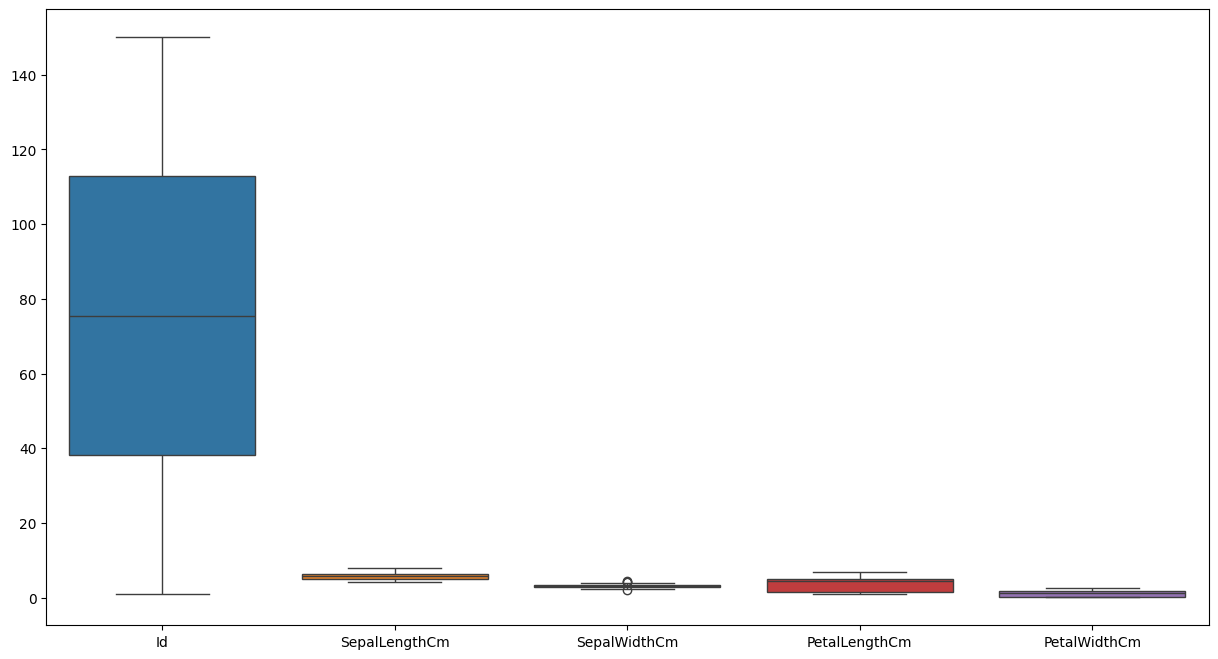

In [53]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data,width=0.8)
plt.show()

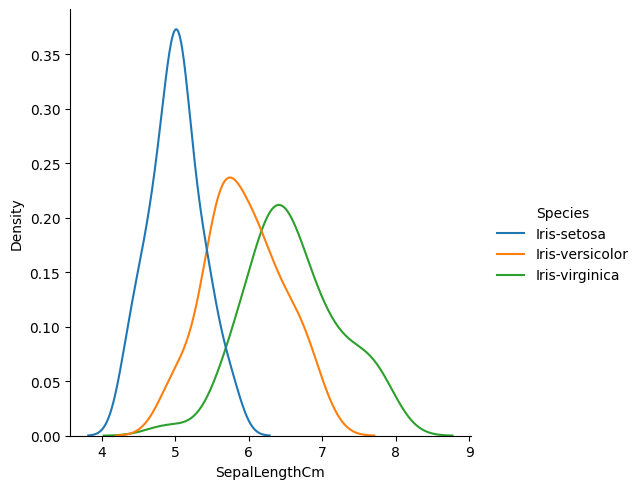

In [54]:
sns.displot(data = data, x = 'SepalLengthCm', hue = 'Species', kind = 'kde')
plt.show()

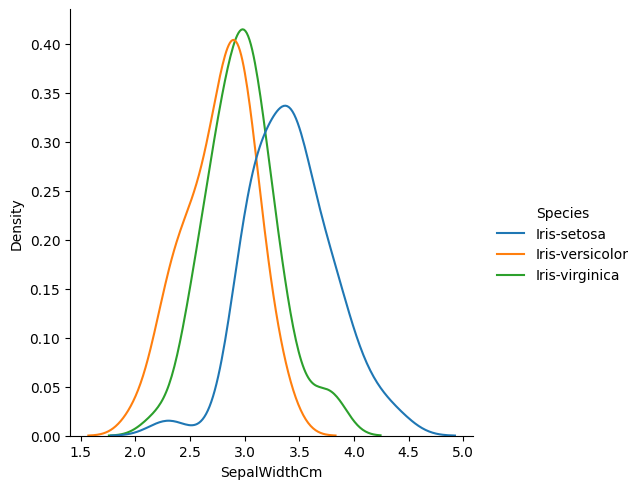

In [55]:
sns.displot(data = data, x = 'SepalWidthCm', hue = 'Species', kind = 'kde')
plt.show()

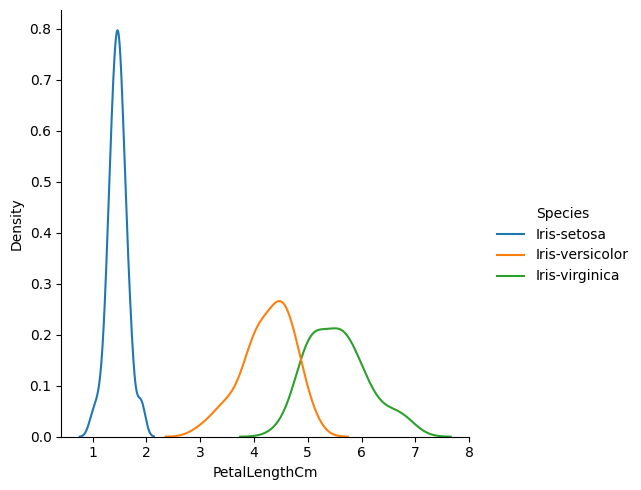

In [56]:
sns.displot(data = data, x = 'PetalLengthCm', hue = 'Species', kind = 'kde')
plt.show()

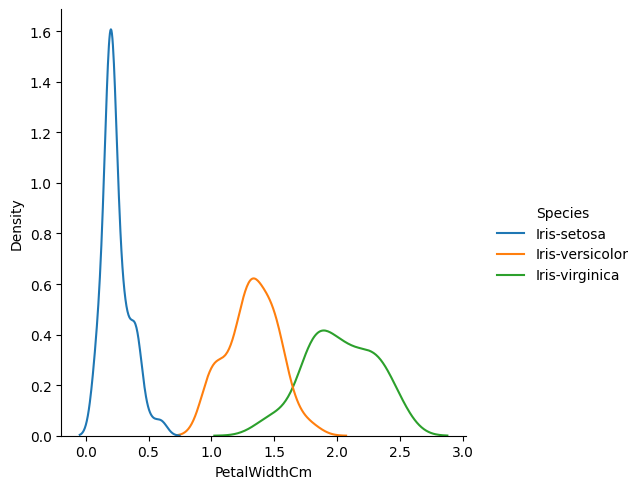

In [57]:
sns.displot(data = data, x = 'PetalWidthCm', hue = 'Species', kind = 'kde')
plt.show()

**Label Encoding**

In [58]:
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

**Correlation Map**

<Axes: >

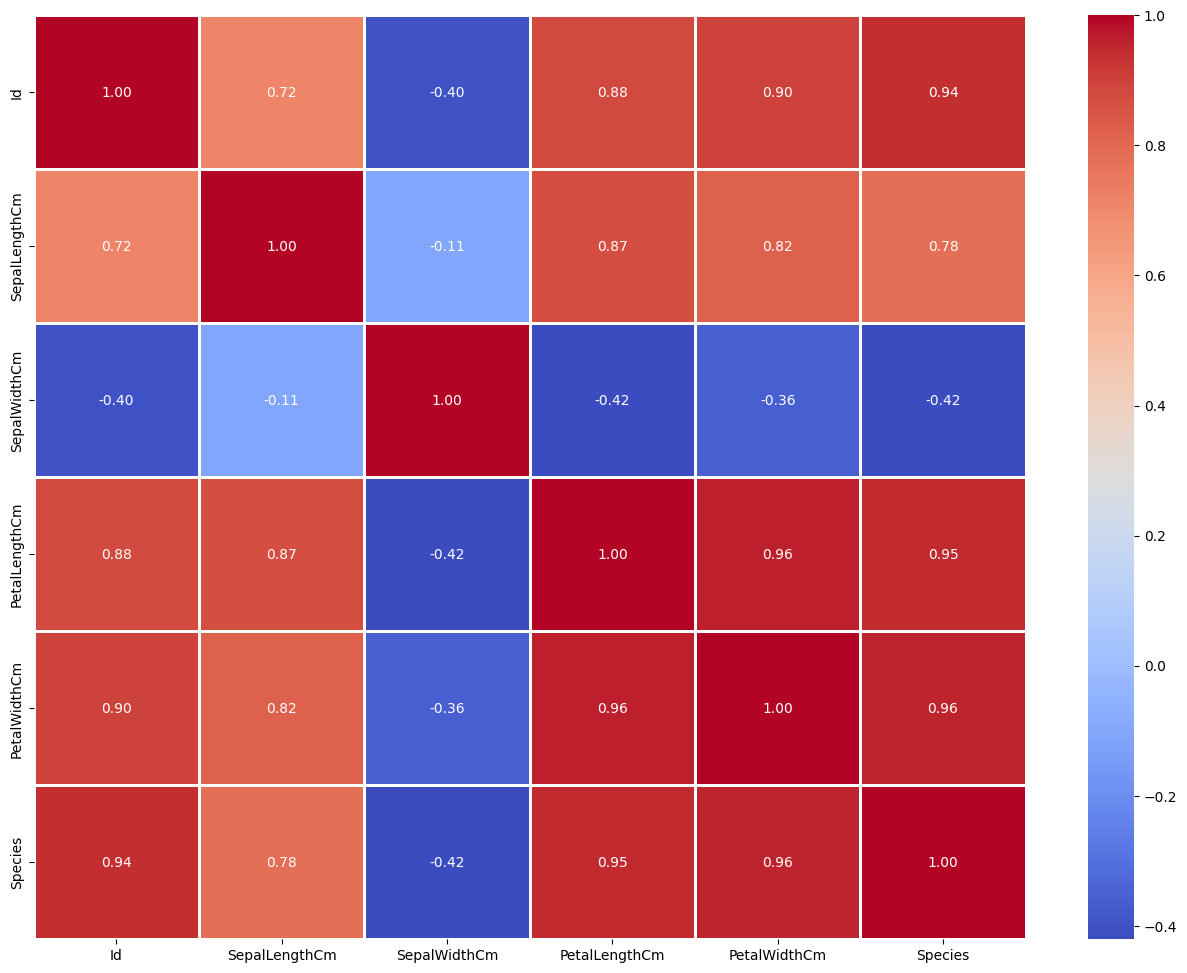

In [59]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,fmt='1.2f',annot_kws={'size':10},linewidth=1,cmap='coolwarm')

In [60]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [61]:
data['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [62]:
data = data.drop('Id',axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [64]:
x=data.drop(['Species'],axis=1)
y=data['Species']

In [65]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [67]:
x.shape, y.shape

((150, 4), (150,))

**Features and Targets**

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [69]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [70]:
x_test.shape, y_test.shape

((30, 4), (30,))

**Logistic Regression**

In [71]:
lr=LogisticRegression()

lr.fit(x_train, y_train)
pred = lr.predict(x_test)
acc=accuracy_score(y_test,pred)
print(classification_report(y_test, pred))
print("Accuracy : ",acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy :  0.9666666666666667


In [72]:
confusion_matrix(y_test, pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

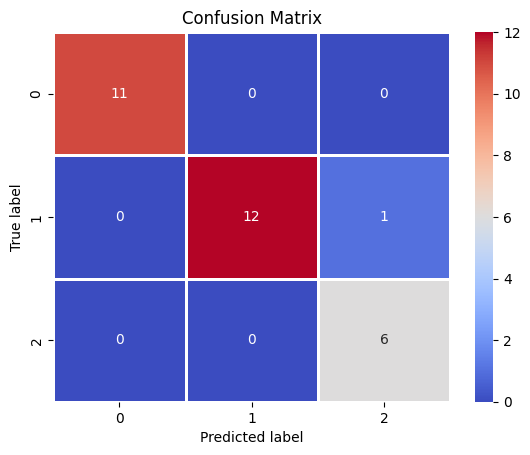

In [73]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True,fmt='1d',annot_kws={'size':10},linewidth=1,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Decision Tree Classifier**

In [74]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)
pred = dt.predict(x_test)
acc=accuracy_score(y_test,pred)
print(classification_report(y_test, pred))
print("Accuracy : ",acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy :  0.9666666666666667


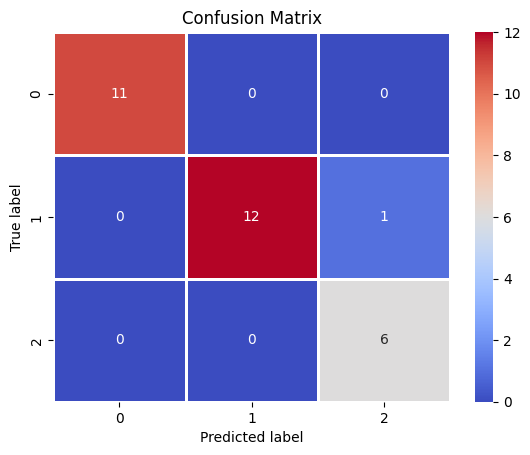

In [75]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True,fmt='1d',annot_kws={'size':10},linewidth=1,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [76]:
svc=SVC()

svc.fit(x_train, y_train)
pred = svc.predict(x_test)
acc=accuracy_score(y_test,pred)
print(classification_report(y_test, pred))
print("Accuracy : ",acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy :  0.9666666666666667


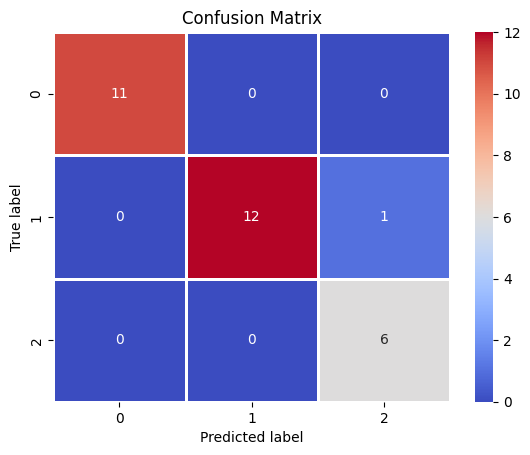

In [77]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True,fmt='1d',annot_kws={'size':10},linewidth=1,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [78]:
reverse_encoding = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica' }

y_test = y_test.map(reverse_encoding)

**Samples**

In [79]:
lr=LogisticRegression()

lr.fit(x_train, y_train)
pred = lr.predict(x_test)
pred = np.array([reverse_encoding[label] for label in pred])
out = pd.DataFrame({"Actual Species": y_test,"Predicted Species":pred})
Result = data.merge(out, left_index =True, right_index = True)
Result[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Actual Species','Predicted Species']].sample(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Actual Species,Predicted Species
99,5.7,2.8,4.1,1.3,Iris-versicolor,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
84,5.4,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor,Iris-versicolor
19,5.1,3.8,1.5,0.3,Iris-setosa,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa,Iris-setosa
